### Underfitting and Overfitting
### One-hot and Embedding
### Normalize and Scale
### Machine Learning pipeline


### 常用机器学习模型
##### 1. KNN
##### 2. Decision Tree
##### 3. Support vector machine
##### 4. Bayes classifier
##### 5. Boosting

### KNN的优点和缺点
##### 优点
- 容易实现
- 模型容易调整, 可以方便的获取K的数量, 或者给不同距离的K进行加权
- 适合解决各种复杂问题 (分类, 回归, 高维, 低维, 复杂关系, 简单关系)

##### 缺点
- KNN运行时间久
- 容易被异常值影响
- 所需空间大
- 高维空间的距离区分度不大



### Bayes

### SVM
https://zhuanlan.zhihu.com/p/76609851?from_voters_page=true
##### 1. 通过一条直线将样本点进行分割
1). If we define the labels with 1 and -1

2). This can be written $ y_i (w * x_i - b) > 1 $

3). This margin of closest points to this line is : $ \frac{2}{||w||}$

4). Minimize ||w|| subject to  $ y_i (w * x_i - b) > 1 $ ,for i == 1, ... , n

5). We can use gradient descent to get the right  𝑤

##### 2. 核函数：低维空间无法分割，通过核函数变换上升到高维空间
##### 3. loss
$$ loss = max(0, 1 - y_i(\vec{w^t}\vec{x_i} - b)) $$ 
loss 对 $ \vec{w^t} $ 求导： $$ \frac{\partial{loss}}{\partial{w}}$$
##### 4. Add the regularization
$$ loss = max(0, 1 - y_i(\vec{w^t}\vec{x_i} - b)) + \lambda ||w||^2 $$

In [20]:
import numpy as np
import matplotlib.pyplot as plt

label_a = np.random.normal(6, 2, size=(50, 2))
label_b = np.random.normal(-6, 2, size=(50, 2))

In [106]:
def f(x, k, b):
    return k * x - b

def svm(label_a, label_b, rand_num=100, dis_threshol=3):
    k_and_b = []
    label_a_x = label_a[:, 0]
    label_b_x = label_b[:, 0]
    for _ in range(rand_num):
        k, b = (np.random.random(size=(1, 2)) * 10 - 5)[0]
        if np.max(f(label_a_x, k, b)) <= -dis_threshol and np.min(f(label_b_x, k, b)) >= dis_threshol:
            k_and_b.append((k, b))

    plt.scatter(*zip(*label_a))
    plt.scatter(*zip(*label_b))
    for k, b in k_and_b:
        x = np.c_[[label_a_x, label_b_x]]
        plt.plot(x, f(x, k, b))
    return k_and_b

[(-4.954159779162288, -1.5448389783860472)]

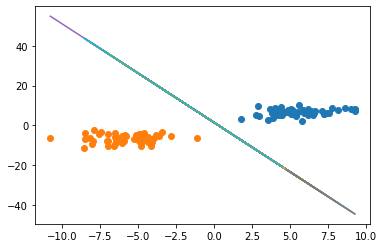

In [115]:
svm(label_a, label_b, rand_num=1000, dis_threshol=7)

### Decision Tree
##### 优点
- 1. clear to explain
- 2. could select salient features

##### 缺点
- 1. so sensitive
- 2. fit ability is limited

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [117]:
iris_data = load_iris()
x_data = iris_data.data
y_data = iris_data.target

In [118]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_data, y_data)

DecisionTreeClassifier()

In [ ]:
export_graphviz(tree_clf, 
                out_file='iris_tree.dot', 
                feature_names=iris_data.feature_names, 
                class_names=iris_data.target_names, 
                rounded=True, 
                filled=True)
!dot -Tpdf iris_tree.dot -o outfile.pdf

### Random Forest

In [127]:
import pandas as pd
import random

from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [124]:
data = load_boston()
x_data = pd.DataFrame(data.data, columns=[data.feature_names])
y_data = data.target

In [134]:
# 随机抽样删除特征
def random_select(df, drop_num=4):
    columns = random.sample(list(df.columns), k=len(df.columns) - drop_num)
    return df[columns]

sample_x = random_select(x_data)

X_train, X_test, y_train, y_test = train_test_split(sample_x, y_data, test_size=0.3)
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)
print('DecisionTree train score: ', clf.score(X_train, y_train))
print('DecisionTree test score: ', clf.score(X_test, y_test))

In [148]:
def random_tree(X_train, X_test, y_train, y_test, drop_num=4):
    X_train_sample = random_select(X_train, drop_num=drop_num)
    X_test_sample = X_test[X_train_sample.columns]
    clf = DecisionTreeRegressor()
    clf.fit(X_train_sample, y_train)
    
    print('random tree train score: ', clf.score(X_train_sample, y_train))
    print('random tree test score: ', clf.score(X_test_sample, y_test))
    
    y_pred = clf.predict(X_test_sample)
    return y_pred

def random_forest(X_train, X_test, y_train, y_test, tree_num=4):
    y_pred = [random_tree(X_train, X_test, y_train, y_test) for _ in range(tree_num)]
    return np.mean(y_pred, axis=0)

In [176]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)
y_pred = random_forest(X_train, X_test, y_train, y_test, tree_num=10)
r2_score(y_test, y_pred)

random tree train score:  1.0
random tree test score:  0.3318240977672162
random tree train score:  1.0
random tree test score:  0.7609658630952756
random tree train score:  1.0
random tree test score:  0.6814862830039353
random tree train score:  1.0
random tree test score:  0.7472407128773455
random tree train score:  1.0
random tree test score:  0.7867356355763038
random tree train score:  1.0
random tree test score:  0.6933732509479176
random tree train score:  1.0
random tree test score:  0.5348006792817928
random tree train score:  1.0
random tree test score:  0.15327890419478996
random tree train score:  1.0
random tree test score:  0.7738859699815496
random tree train score:  1.0
random tree test score:  0.8098646982121396


0.8834750595788339

### Ensemble Learning 集成学习
##### 可以集成多个回归或者分类模型来提高模型的能力

In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
# https://zhuanlan.zhihu.com/p/76609851?from_voters_page=true
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingRegressor # 集成学习做回归
from sklearn.ensemble import VotingClassifier # 集成学习做分类

In [204]:
def ensemble_regressor(X_train, X_test, y_train, y_test):
    
    lr_clf = LinearRegression()
    svr_clf = SVR()
    rfr_clf = RandomForestRegressor()

    voting_clf = VotingRegressor(
        estimators=[('lr', lr_clf), ('rf', rfr_clf), ('svr', svr_clf)]
    )
    voting_clf.fit(X_train, y_train)
    print('voting classify train score', voting_clf.score(X_train, y_train))
    print('voting classify test score', voting_clf.score(X_test, y_test))
    return voting_clf.predict(X_test)

def ensemble_classify(X_train, X_test, y_train, y_test):
    lr_clf = LogisticRegression()
    rfc_clf = RandomForestClassifier()
    svc_clf = SVC()
    
    voting_clf = VotingClassifier(
        estimators=[('lr', lr_clf), ('rf', rfc_clf), ('svc', svc_clf)], 
        voting='hard'
    )
    voting_clf.fit(X_train, y_train)
    print('voting classify train score', voting_clf.score(X_train, y_train))
    print('voting classify test score', voting_clf.score(X_test, y_test))
    return voting_clf.predict(X_test)

In [205]:
ensemble_regressor(X_train, X_test, y_train, y_test)
from sklearn.datasets import load_iris
data = load_iris()
x_data = data.data
y_data = data.target

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)
ensemble_classify(X_train, X_test, y_train, y_test), y_test

voting classify train score 0.9725268528814655
voting classify test score 0.9458407995122049
voting classify train score 0.9904761904761905
voting classify test score 0.9555555555555556


(array([2, 2, 1, 2, 2, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 1, 2, 2, 0, 1, 0, 0,
        1, 1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 1, 2, 1,
        2]),
 array([2, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 0, 1, 2, 2, 0, 1, 0, 0,
        1, 1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 1, 2, 1,
        2]))

### Bagging and Boosting Learning
https://blog.csdn.net/u014114990/article/details/50948079
##### Bagging：
原始数据集通过T次随机采样，得到T个与原始数据集相同大小的子数据集，分别训练得到T个弱分类器Classifier，然后结合为一个强分类器。
将所有特征放到一个袋子里，然后抽取一些特征进行训练，然后对结果取均值
##### Boosting：
boosting也是通过重采样得到多个弱分类器，最后得到一个强分类器。区别是boosting是基于权值的弱分类器集成。
##### Bagging与Boosting的区别
1. 二者的主要区别是取样方式不同, Bagging采用均匀取样，而Boosting根据错误率来取样，因此Boosting的分类精度要优于Bagging
2. Bagging可通过并行训练节省大量时间开销。
3. bagging和boosting都可以有效地提高分类的准确性。
4. boosting的准确性比bagging高,但是有可能引起过拟合
##### AdaBoost
adaboost就是我们最开始学习的时候，每个样本的权重是一样的，每学习一次就根据样本的错误率来更新一下样本权重，最后将这些预测的好的树给与不同的权重加在一起就组成了我们最后的模型
##### GBDT
GBDT核心思想就是每次树学习的目标是上一课树的残差，就是上一课树学习出来的结果与我们实际结果的差值；最后把所有树累加到一起就是我们最后的树模型

### AdaBoost & Gradient Descent Boost

##### Adaptive Boosting：下一次学习会根据上一次学习的误差率更新样本权重，错误率高的权重更高，类似于学习的时候更关注错题
1. 初始化 t 个弱分类器 $ D_t $
2. 假设 $ h_t $ 属于{-1， +1}
3. 获取 $ h_t$ 权重误差 
$$ \varepsilon_t = Pr_i{D_t}[h_t(x_i) != y_i ]$$
4. 选择一个$\alpha_t $, $ \alpha_t = \frac{1}{2}ln(\frac{1 - \varepsilon_t}{\varepsilon_t}) $, $ \varepsilon_t $ 越大，$\alpha_t $ 越小
5. 遍历 m 条数据, $ Z_t $ 是一个标准化因子
$$ D_{t+1}(i) = \frac{D_t(i)exp(-\alpha_ty_ih_t(x_i))}{Z_t} $$
6. 输出最终假设
$$ H(x) = sign(\sum_{t=1}^T \alpha_t h_t(x)) $$

![image.png](./img/AdaBoost.png)

##### Gradient Boosting : 下一次学习是上一次学习的残差
1. 

![image.png](./img/GBDT.png)

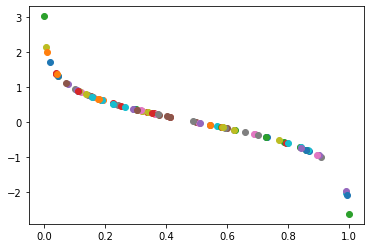

In [226]:
def func(x):
    return np.log10((1 - x) / x)


for _ in range(100):
    x = np.random.random(size=(1, 2))[0][0]
    plt.scatter(x, func(x))